In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'BMJUA_ttf'

In [17]:
df_qna = pd.read_csv('../data/wiggle.qna.csv')

In [18]:
df_product = pd.read_csv('../data/wiggle.product.csv')

## 데이터 전처리

### 결측치 변환 / id열 제거

In [19]:
df_qna = df_qna.fillna('-')

In [20]:
df_product = df_product.drop(columns='_id')

### 상품 카테고리 번호 지정

In [21]:
df_product['catagory_index'] = df_product.index.to_list()
df_product['full_category'] = df_product['large_category'] + ' ' + df_product['middle_category'] + ' ' + df_product['small_category']

### qna 상품 카테고리 번호 지정

In [22]:
# 카테고리 부여 함수 제작
def get_category(getlist,issame,fullcate):
    category_list = []
    cate_name_list = []
    issame = issame.to_list()
    for i in getlist:
        if i == '-':
            category_list.append(np.nan)
            cate_name_list.append(np.nan)
        elif i in issame:
            category_list.append(int(issame.index(i)))
            cate_name_list.append(fullcate.iloc[int(issame.index(i))])
        else:
            category_list.append('판매종료상품')
            cate_name_list.append('판매종료상품')

    large_category =[]
    middle_category = []
    small_category = []

    for i in cate_name_list:
        try:
            temp_list = i.split(' ')
        except:
            temp_list = []

        if len(temp_list) != 3:
            large_category.append(np.nan)
            middle_category.append(np.nan)
            small_category.append(np.nan)
        else:
            large_category.append(temp_list[0])
            middle_category.append(temp_list[1])
            small_category.append(temp_list[2])

    return category_list, cate_name_list,large_category,middle_category,small_category

In [23]:
df_qna['get_category'], df_qna['category_name'],df_qna['large_category'],df_qna['middle_category'],df_qna['small_category'] = get_category(df_qna['product_name'],df_product['title'],df_product['full_category'])

- 월별 날짜 묶기

In [24]:
df_qna['date'] = df_qna['date'].apply(lambda x : pd.to_datetime(x).strftime("%Y-%m"))

In [25]:
df_qna[:5]

,_id,index_num,product_href,product_name,category,customer_name,date,get_category,category_name,large_category,middle_category,small_category
0,6631b8fae29b6ec61bcab039,23134,https://wiggle-wiggle.com/product/$1/$2/,-,상품 문의,나****,2024-05,NaN,NaN,NaN,NaN,NaN
1,6631b8fae29b6ec61bcab03a,23133,https://wiggle-wiggle.com/product/$1/$2/,-,교환/환불 문의,김****,2024-05,NaN,NaN,NaN,NaN,NaN
2,6631b8fbe29b6ec61bcab03b,23132,https://wiggle-wiggle.com/product/%EB%B3%B4%EA...,[보그스X위글위글] 아동용 레인부츠 - BLUE,상품 문의,박****,2024-05,142,fashion 신발 -,fashion,신발,-
3,6631b8fbe29b6ec61bcab03c,23131,https://wiggle-wiggle.com/product/%ED%92%80%EB...,풀림방지 실리콘참 3 SET - Cherry,상품 문의,박****,2024-05,162,fashion 액세서리 실리콘참,fashion,액세서리,실리콘참
4,6631b8fbe29b6ec61bcab03d,23130,https://wiggle-wiggle.com/product/sk%EB%A7%A4%...,[SK매직X위글위글] 미니 정수기,상품 문의,김****,2024-05,272,electronics - -,electronics,-,-


### 카테고리 별 문의 수

In [27]:
df_qna.value_counts('large_category').index

Index(['fashion', 'living', 'digital', 'outdoor', 'family', 'collabo',
       'electronics'],
      dtype='object', name='large_category')

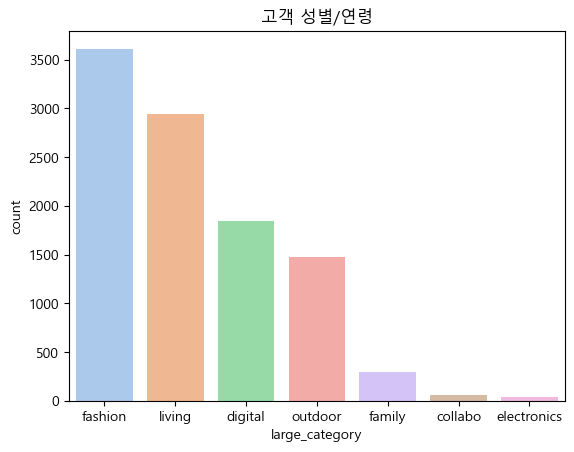

In [28]:
order = df_qna.value_counts('large_category').index
sns.countplot(data=df_qna, x='large_category', palette='pastel',order=order)

plt.title('카테고리별 문의 수')
plt.show()

### 상품 별 문의 수

In [13]:
df_qna.value_counts('product_name')

product_name
-                                5138
[앱코X위글위글] 키보드 - Color Mix         597
보냉백(S/L) - Smile We Love          489
레디백                               445
보냉백(L) - Smile We Love            415
                                 ... 
파자마 세트(롱) - Wild And Free           1
양면 버킷햇 - Greenery Check             1
암막 양우산 - Smile We Love Safari       1
노즈워크 장난감 - Lobster                  1
[주문제작] 하드케이스 - Cherry               1
Name: count, Length: 789, dtype: int64

### 문의 종류

In [14]:
df_qna.value_counts('category')


category
상품 문의              14387
배송 문의               2278
기타 문의               2185
교환/환불 문의            1806
재입고                  586
                   ...  
사이즈 문의 드립니다!           1
사이즈 문의드립니다!            1
사이즈 변경                 1
사이즈 변경 가능할까요? ㅠ        1
회원탈퇴요청드립니다.            1
Name: count, Length: 1107, dtype: int64

### 기간별 문의 수

In [15]:
df_qna.value_counts('date')

date
2023-02    2118
2023-07    2098
2022-08    2018
2022-12    1599
2023-09    1566
2023-12    1351
2024-02    1306
2022-09    1167
2024-03    1079
2023-04    1021
2023-08     975
2023-05     939
2023-06     890
2022-10     881
2022-11     880
2023-10     816
2023-11     773
2023-03     741
2023-01     712
2024-04     673
2024-01     670
2022-07     101
2021-09      82
2024-05       9
Name: count, dtype: int64